## Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
dict_org = {"alice": {"restA": 5, "restB": 3, "restC": 4,"restD": 4},
        "user1": {"restA": 3, "restB": 1, "restC": 2,"restD": 3, "restE": 3},
        "user2": {"restA": 4, "restB": 3, "restD": 3, "restE": 5},
        "user3": {"restA": 3, "restC": 1,"restD": 5, "restE": 4},
        "user4": {"restB": 5, "restC": 5,"restD": 2, "restE": 1},
        "user5": {"restB": 4, "restC": 1,"restD": 3, "restE": 1},
        "user6": {"restA": 1, "restC": 3,"restD": 4, "restE": 2},
        "user7": {"restB": 4, "restC": 4, "restD": 5},
        "user8": {"restA": 3, "restD": 4, "restE": 4},
        "user9": {"restB": 1, "restC": 4, "restE": 5},
        "user10": {"restB": 2, "restC": 3,"restD": 2, "restE": 3},
        }

------------------------------------

### *추천 시스템
![](https://drive.google.com/uc?export=view&id=1Mj4K4tNZFZPKCabGpy9RDEIbCywnhyhR)

# 1. 협업필터링 - Collaborative Filtering (CF)

In [6]:
df.T

,alice,user1,user2,user3,user4,user5,user6,user7,user8,user9,user10
restA,5.0,3.0,4.0,3.0,NaN,NaN,1.0,NaN,3.0,NaN,NaN
restB,3.0,1.0,3.0,NaN,5.0,4.0,NaN,4.0,NaN,1.0,2.0
restC,4.0,2.0,NaN,1.0,5.0,1.0,3.0,4.0,NaN,4.0,3.0
restD,4.0,3.0,3.0,5.0,2.0,3.0,4.0,5.0,4.0,NaN,2.0
restE,NaN,3.0,5.0,4.0,1.0,1.0,2.0,NaN,4.0,5.0,3.0


In [8]:
np.array(dict_org)

array({'alice': {'restA': 5, 'restB': 3, 'restC': 4, 'restD': 4}, 'user1': {'restA': 3, 'restB': 1, 'restC': 2, 'restD': 3, 'restE': 3}, 'user2': {'restA': 4, 'restB': 3, 'restD': 3, 'restE': 5}, 'user3': {'restA': 3, 'restC': 1, 'restD': 5, 'restE': 4}, 'user4': {'restB': 5, 'restC': 5, 'restD': 2, 'restE': 1}, 'user5': {'restB': 4, 'restC': 1, 'restD': 3, 'restE': 1}, 'user6': {'restA': 1, 'restC': 3, 'restD': 4, 'restE': 2}, 'user7': {'restB': 4, 'restC': 4, 'restD': 5}, 'user8': {'restA': 3, 'restD': 4, 'restE': 4}, 'user9': {'restB': 1, 'restC': 4, 'restE': 5}, 'user10': {'restB': 2, 'restC': 3, 'restD': 2, 'restE': 3}},
      dtype=object)

![](https://drive.google.com/uc?export=view&id=1Fzyb3uSTbrVpu3qVk5PsVkAH4UhlQDPR)

![](https://drive.google.com/uc?export=view&id=1PWh0WRYqRUE9EZHNtDXyoMV9k_lhreDe)

In [3]:
#@title 데이터 형태 - User별로 Restaurant에 대해 남긴 평점을 11 * 5 행렬로 나타낸 것
df = pd.DataFrame(dict_org).T
df

,restA,restB,restC,restD,restE
alice,5.0,3.0,4.0,4.0,NaN
user1,3.0,1.0,2.0,3.0,3.0
user2,4.0,3.0,NaN,3.0,5.0
user3,3.0,NaN,1.0,5.0,4.0
user4,NaN,5.0,5.0,2.0,1.0
user5,NaN,4.0,1.0,3.0,1.0
user6,1.0,NaN,3.0,4.0,2.0
user7,NaN,4.0,4.0,5.0,NaN
user8,3.0,NaN,NaN,4.0,4.0
user9,NaN,1.0,4.0,NaN,5.0


In [5]:
df.index

Index(['alice', 'user1', 'user2', 'user3', 'user4', 'user5', 'user6', 'user7',
       'user8', 'user9', 'user10'],
      dtype='object')

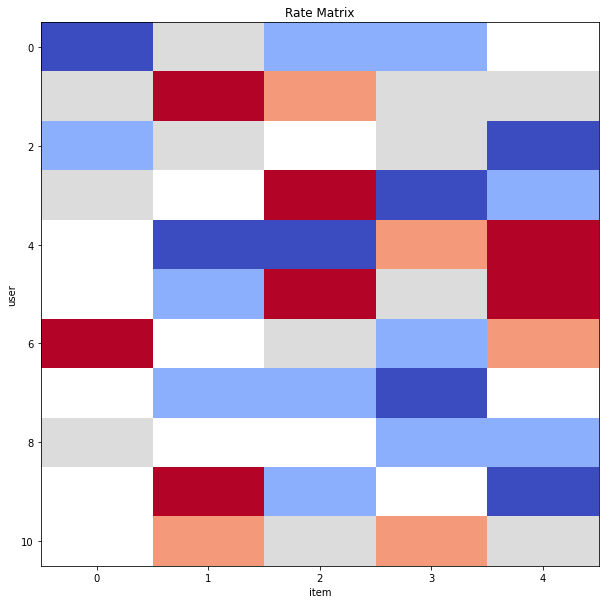

In [ ]:
#@title matrix
plt.figure(figsize=(10,10))
plt.imshow(df, cmap="coolwarm_r", aspect='auto')
plt.grid(False)
plt.xlabel("item")
plt.ylabel("user")
plt.title("Rate Matrix")
plt.show()

***CF의 목적은 비어있는 값을 예측하여 user 또는 item 기준으로 가장 유사성이 높은 항목을 고객에게 추천해주는 것(예측의 대상은 보통 선호를 나타낼 수 있는 값. e.g. 리뷰평점, 주문빈도, 방문횟수 등)***

# 2. 협업필터링 종류

## 1) Memory-Based Collaborative Filtering

![](https://drive.google.com/uc?export=view&id=1qYm_EB7chllypl1t_pxrHkIKnu8i61i6)

### (1) 사용자 기반(User-Based)
##### 사용자 기반의 CF에서는 사용자간 얼마나 유사한 항목(아이템)을 선호하는지(=유사도)를 측정 및 예측하여 추천에 활용한다.(아이템의 유사성 X)
- A라는 고객과 B라는 고객은 좋아하는 item이 유사하니까 B는 구매했는데 A는 구매하지 않은 아이템을 A에게 추천하자.

### (2) 아이템 기반(Item-Based)
##### 사용자 기반과 유사하나, 아이템간의 유사도를 측정하여 고객별 선호 아이템을 예측한다.
- A라는 아이템과 B라는 아이템이 유사하니까 B는 구매했는데 A는 구매하지 않은 사람에게 A를 추천하자.

![](https://drive.google.com/uc?export=view&id=1vknCDYFU23Q9HVdoyZg4Zt5G4djJn3c6)

In [ ]:
dict_org # dict 안에 또 dict로 감싸줬으니까 첫 번째 dict의 key는 user, 두 번째 dict의 key는 rest가 된다.

{'alice': {'restA': 5, 'restB': 3, 'restC': 4, 'restD': 4},
 'user1': {'restA': 3, 'restB': 1, 'restC': 2, 'restD': 3, 'restE': 3},
 'user10': {'restB': 2, 'restC': 3, 'restD': 2, 'restE': 3},
 'user2': {'restA': 4, 'restB': 3, 'restD': 3, 'restE': 5},
 'user3': {'restA': 3, 'restC': 1, 'restD': 5, 'restE': 4},
 'user4': {'restB': 5, 'restC': 5, 'restD': 2, 'restE': 1},
 'user5': {'restB': 4, 'restC': 1, 'restD': 3, 'restE': 1},
 'user6': {'restA': 1, 'restC': 3, 'restD': 4, 'restE': 2},
 'user7': {'restB': 4, 'restC': 4, 'restD': 5},
 'user8': {'restA': 3, 'restD': 4, 'restE': 4},
 'user9': {'restB': 1, 'restC': 4, 'restE': 5}}

In [ ]:
print(dict_org)
print(dict_org.keys())
print(dict_org["alice"])
print(dict_org["alice"].keys())
print(dict_org["alice"]["restA"])

{'alice': {'restA': 5, 'restB': 3, 'restC': 4, 'restD': 4}, 'user1': {'restA': 3, 'restB': 1, 'restC': 2, 'restD': 3, 'restE': 3}, 'user2': {'restA': 4, 'restB': 3, 'restD': 3, 'restE': 5}, 'user3': {'restA': 3, 'restC': 1, 'restD': 5, 'restE': 4}, 'user4': {'restB': 5, 'restC': 5, 'restD': 2, 'restE': 1}, 'user5': {'restB': 4, 'restC': 1, 'restD': 3, 'restE': 1}, 'user6': {'restA': 1, 'restC': 3, 'restD': 4, 'restE': 2}, 'user7': {'restB': 4, 'restC': 4, 'restD': 5}, 'user8': {'restA': 3, 'restD': 4, 'restE': 4}, 'user9': {'restB': 1, 'restC': 4, 'restE': 5}, 'user10': {'restB': 2, 'restC': 3, 'restD': 2, 'restE': 3}}
dict_keys(['alice', 'user1', 'user2', 'user3', 'user4', 'user5', 'user6', 'user7', 'user8', 'user9', 'user10'])
{'restA': 5, 'restB': 3, 'restC': 4, 'restD': 4}
dict_keys(['restA', 'restB', 'restC', 'restD'])
5


In [ ]:
# user간 레스토랑에 남긴 평점별 scatter plot 출력용 함수 정의
def scatter(data, user_a, user_b):
    plt.figure(figsize=(10,5))
    
    # 빈 리스트 생성(평점을 append할)
    n1 = []
    n2 = []
    
    for i in data[user_a]: # 여기서 i는 두 번째 dict의 key인 rest. i가 dict_org[user_a]의 key에 있으면, 아래 문장을 반복해라.
        if i in data[user_b]: # for문의 i가 dict_org[user_b]의 key에 존재하면(==동일한 rest key가 존재하면 == user a와 b가 동일한 rest i에 평점을 남겼으면)
            n1.append(data[user_a][i]) # user_a의 rest_i에 대한 평점을 n1[]에 append. e.g. n1에 dict_org["alice"]["restA"] = 5 append
            n2.append(data[user_b][i]) # user_b의 rest_i에 대한 평점을 n2[]에 append
            plt.text(data[user_a][i],data[user_b][i],i)
            
    plt.plot(n1,n2,'ro')
    plt.axis([0,6,0,6]) # 축 범위 min(n1), max(n1), min(n2), max(n2)
    plt.xlabel(user_a)
    plt.ylabel(user_b)
    plt.show()


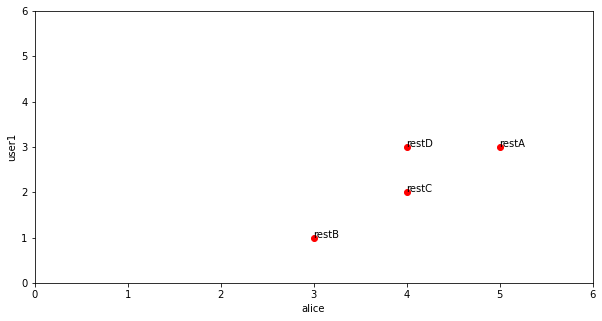

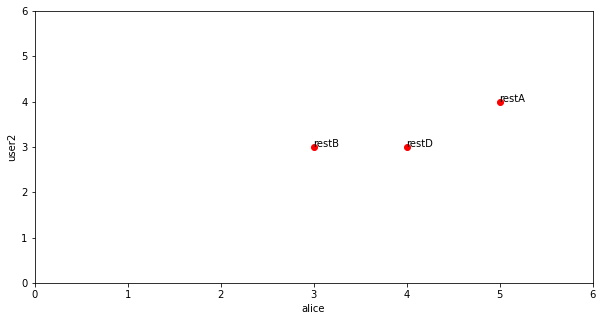

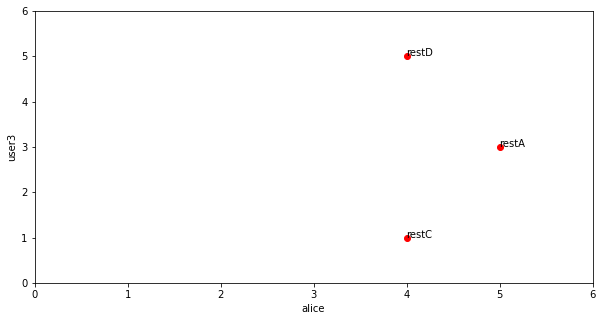

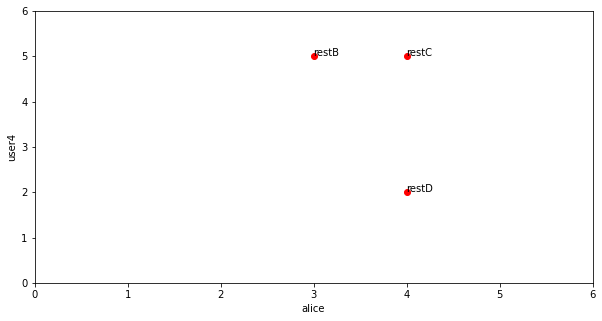

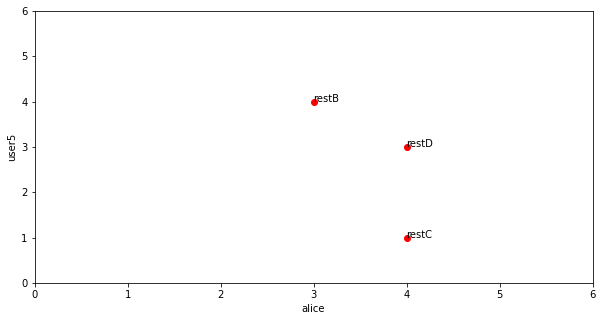

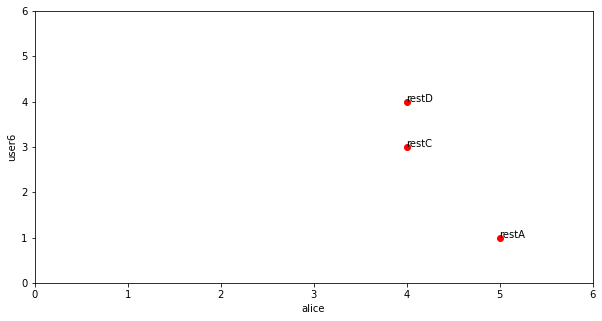

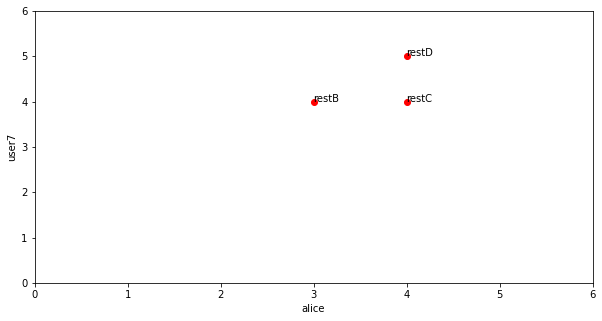

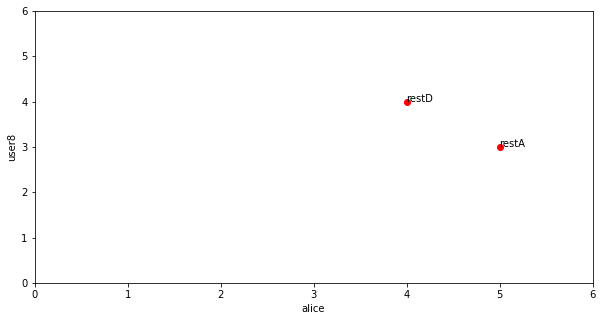

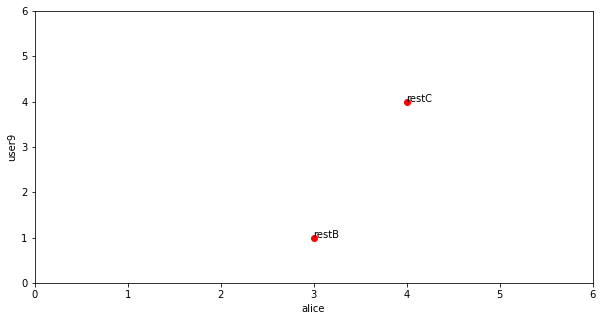

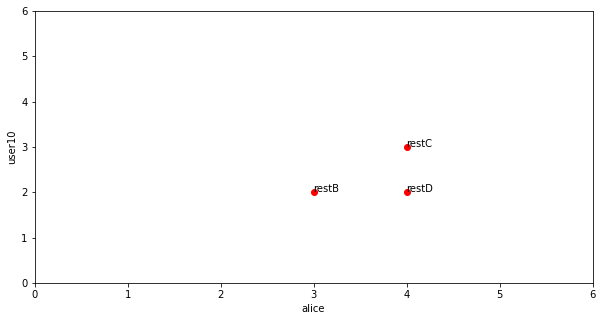

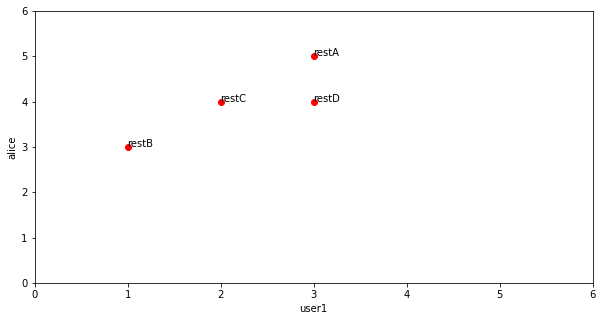

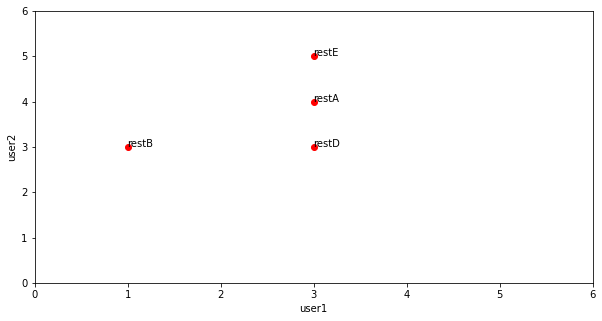

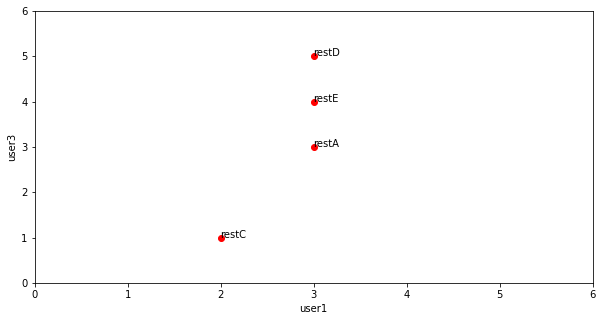

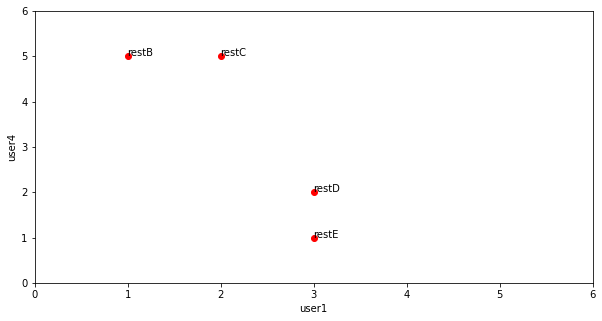

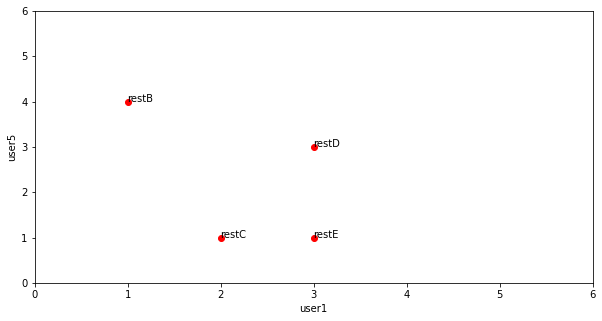

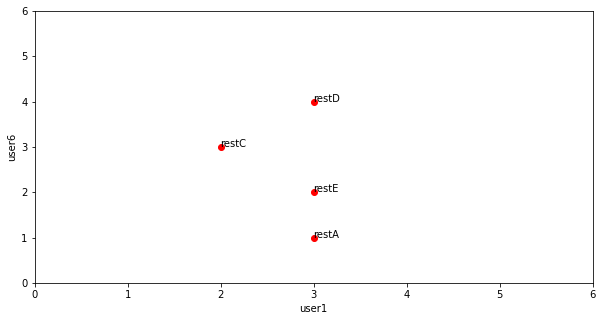

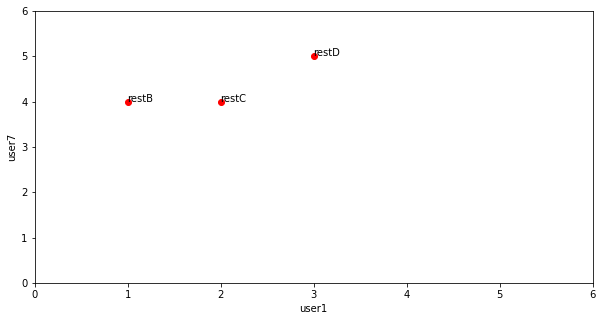

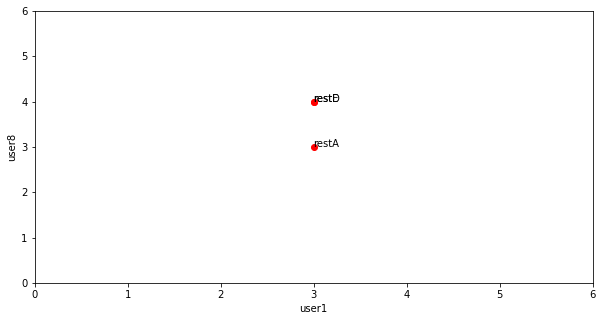

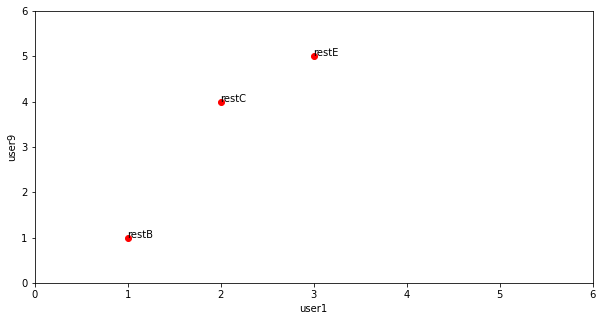

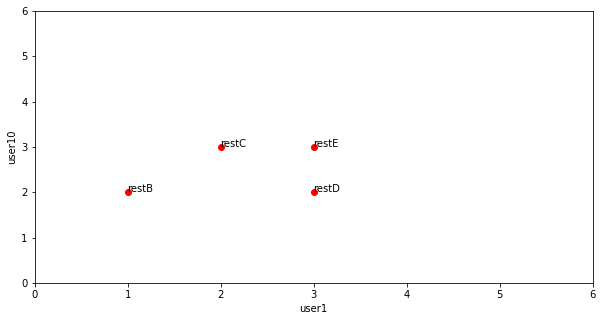

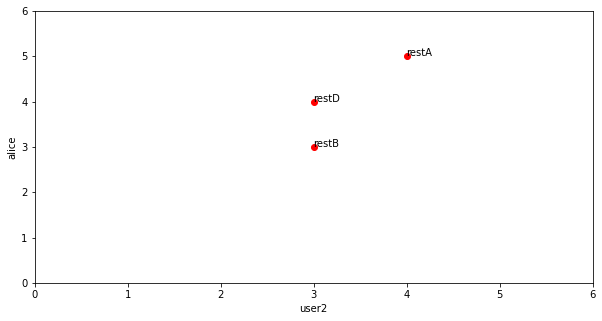

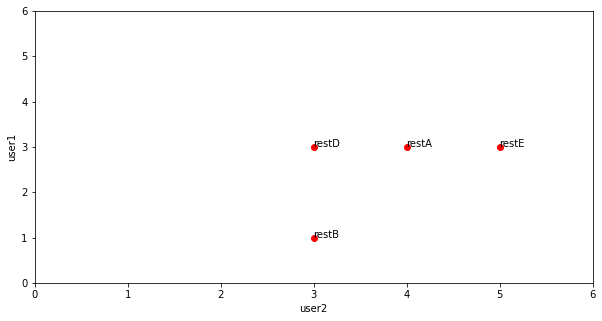

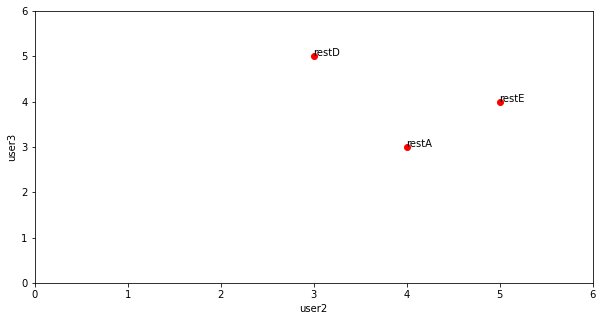

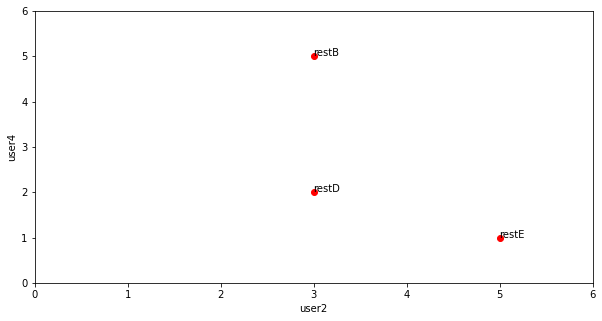

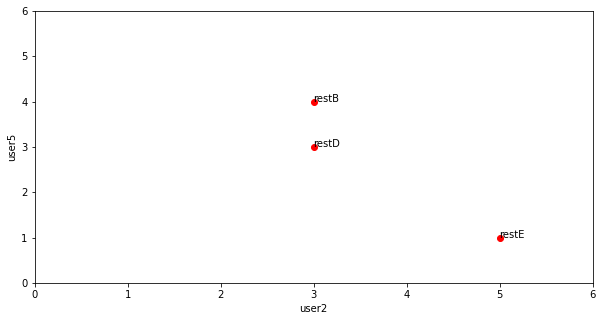

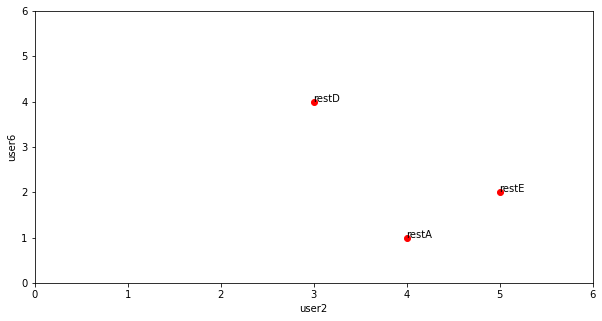

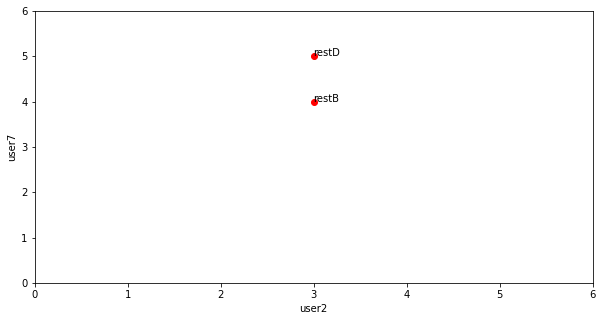

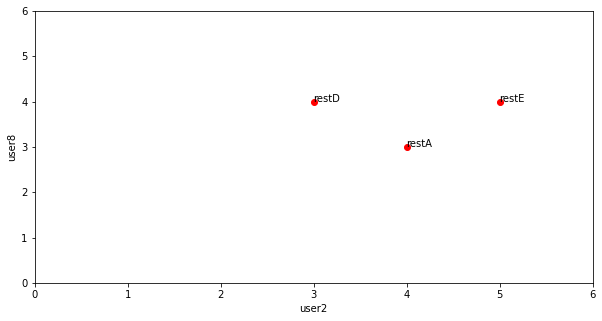

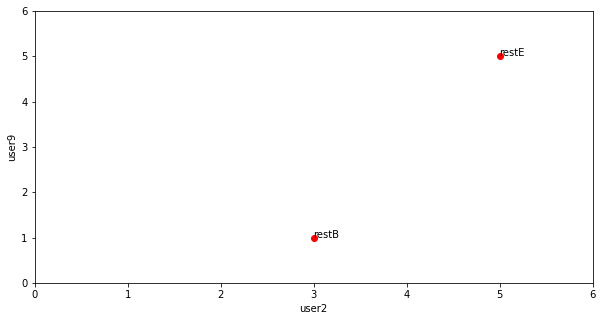

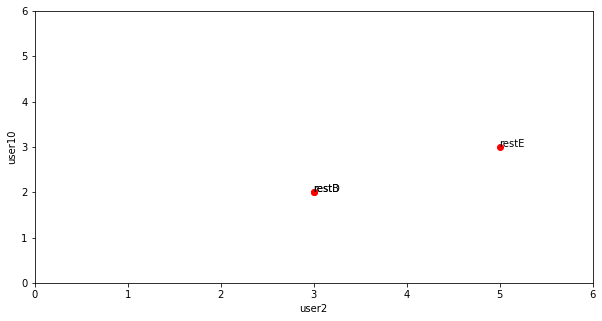

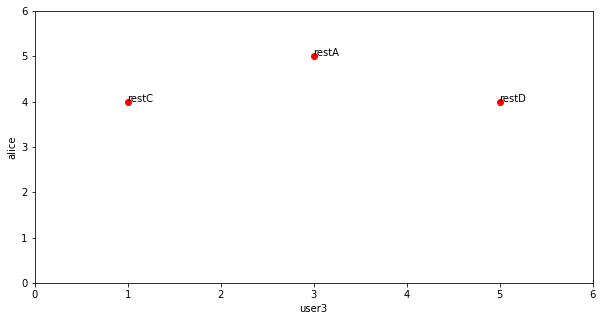

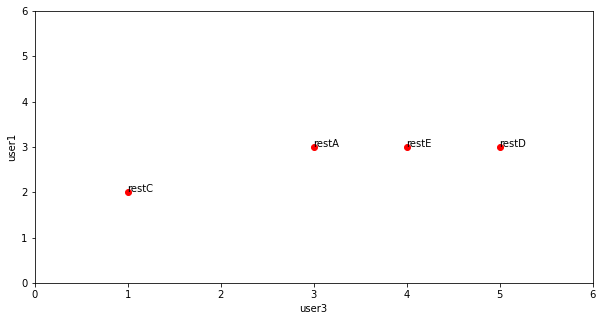

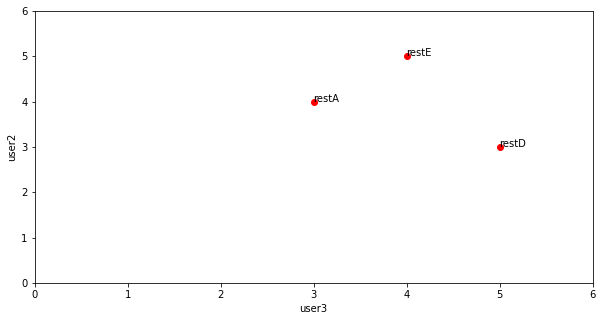

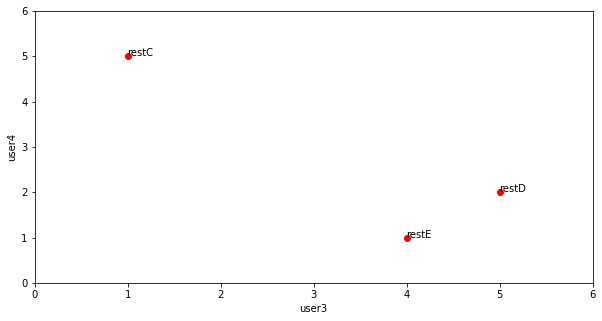

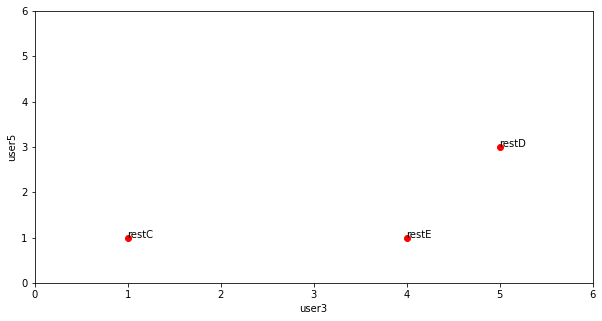

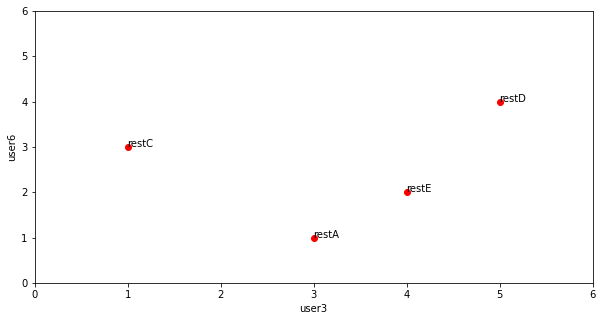

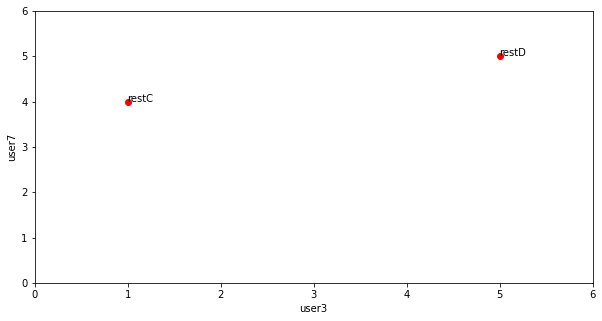

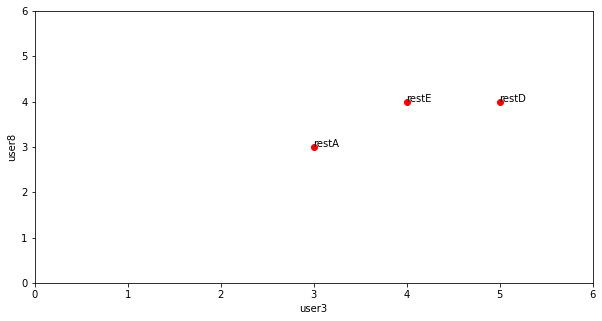

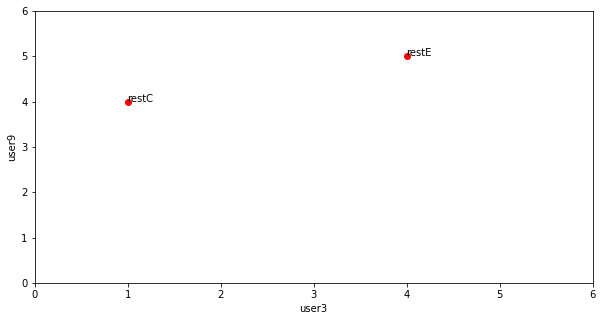

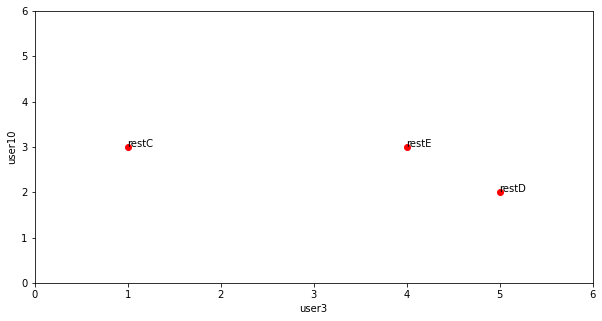

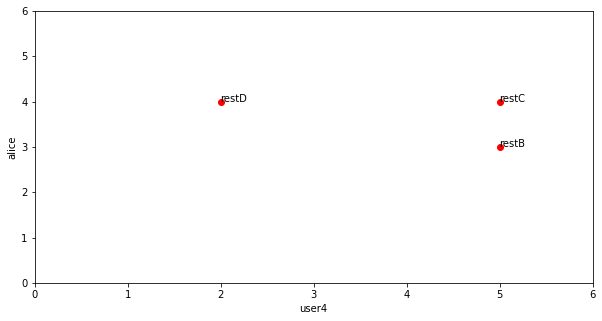

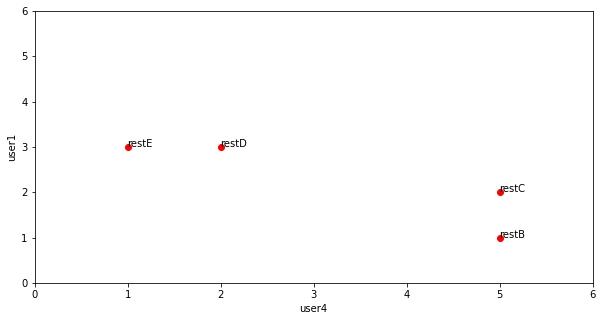

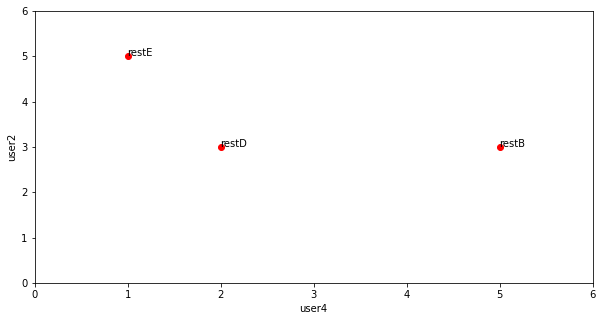

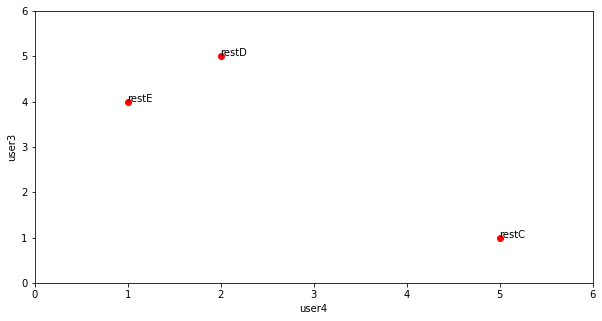

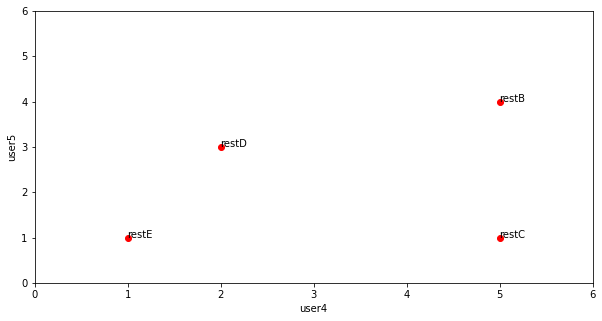

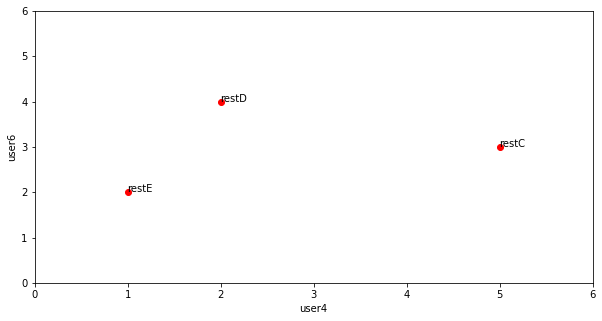

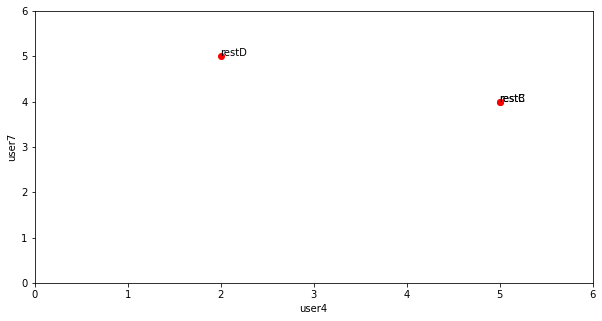

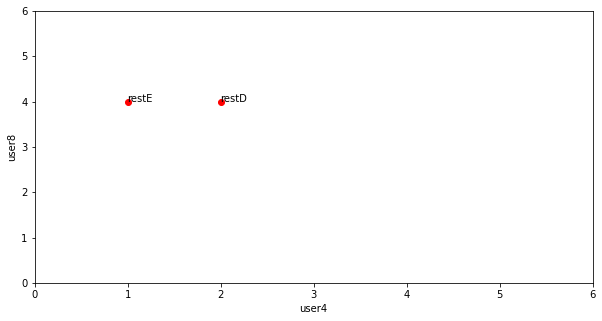

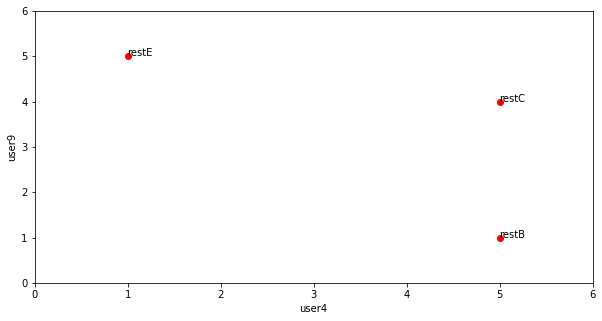

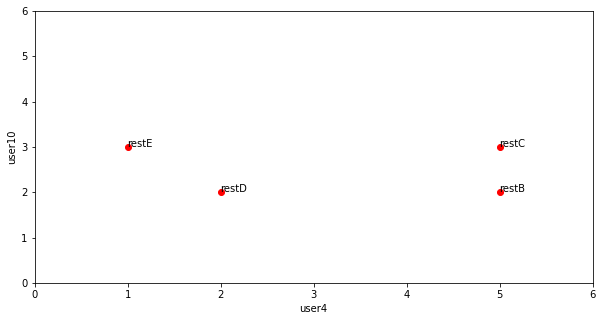

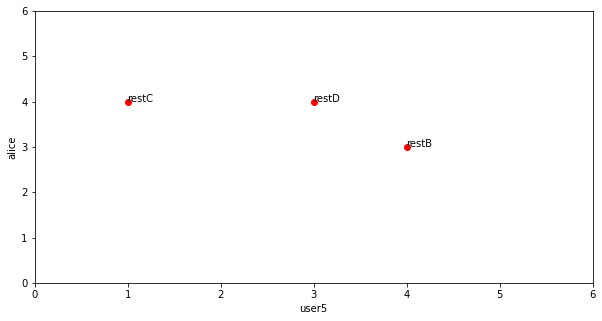

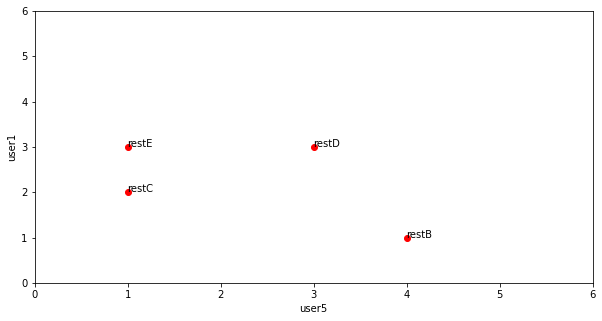

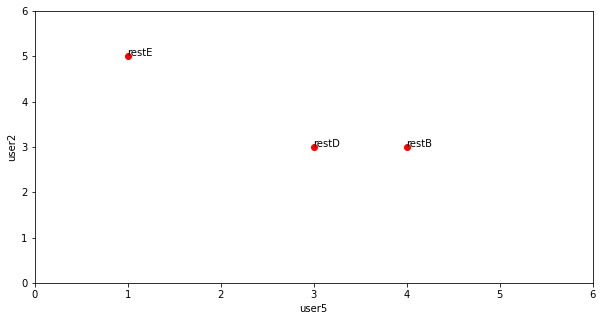

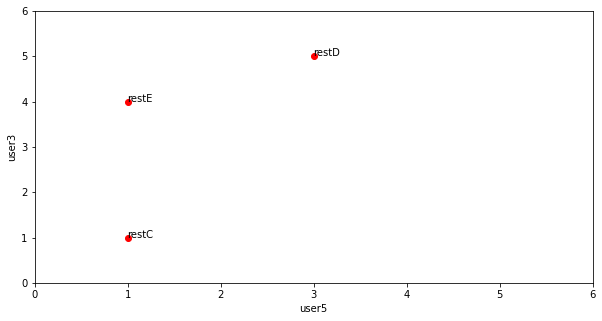

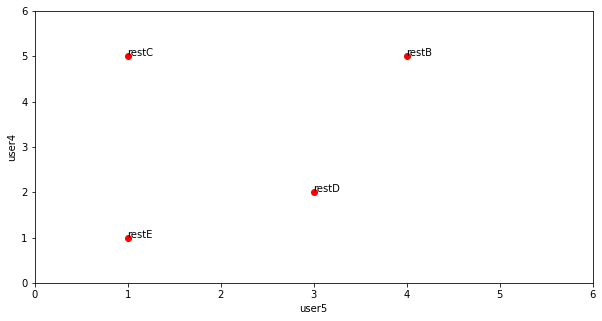

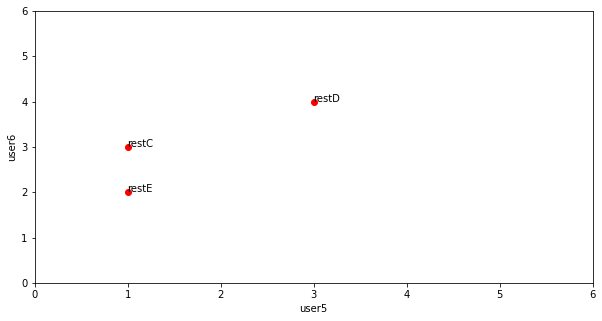

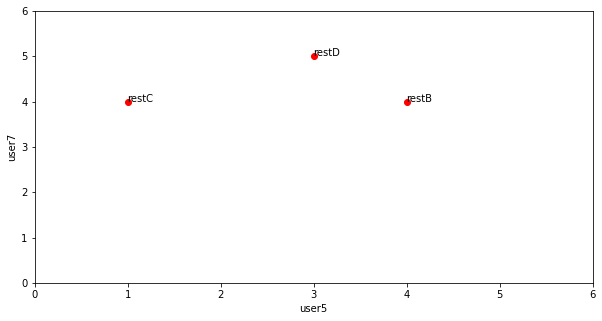

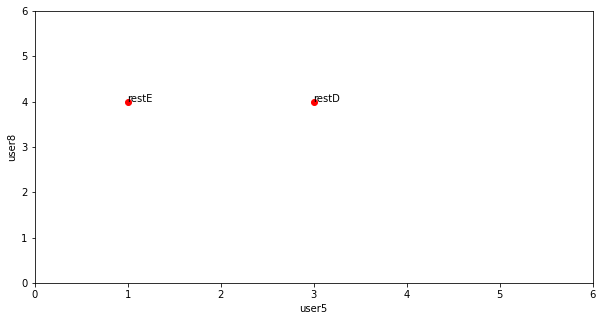

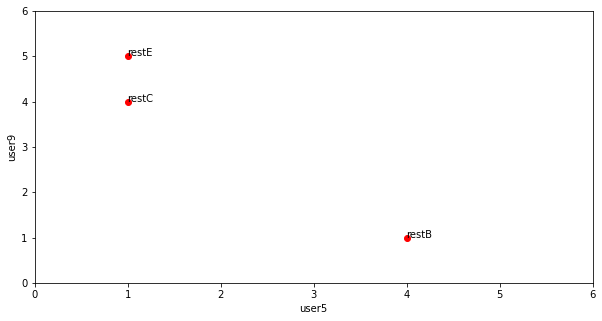

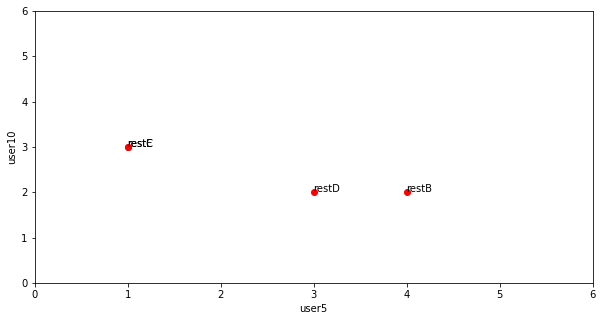

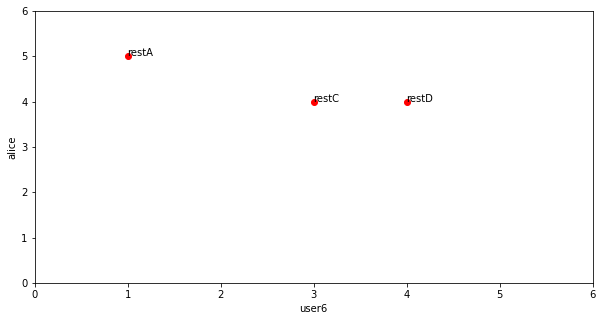

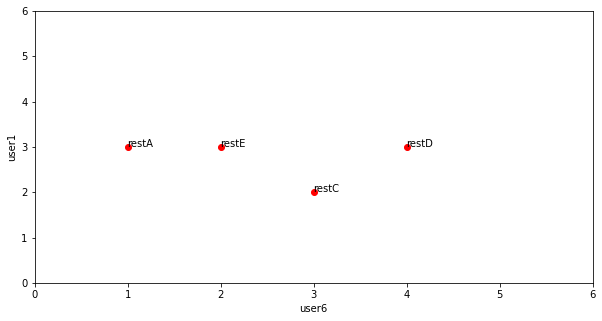

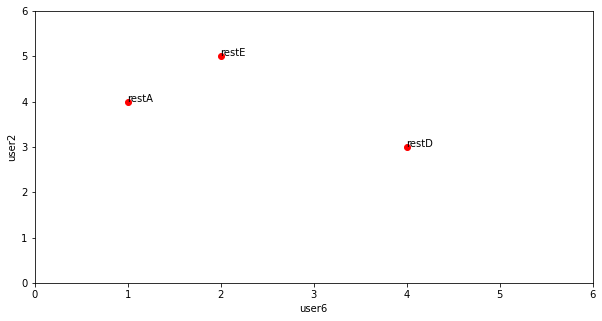

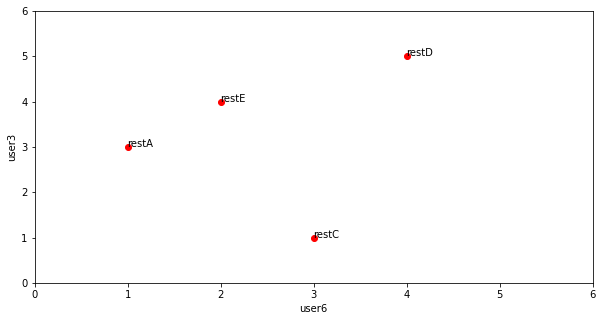

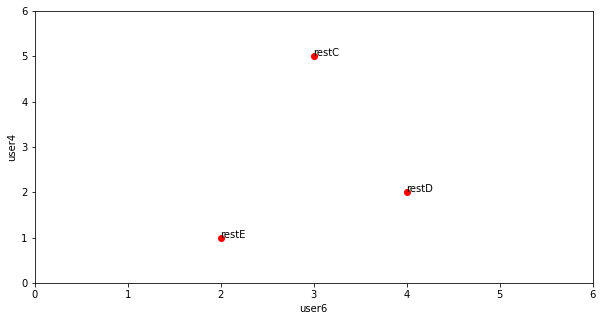

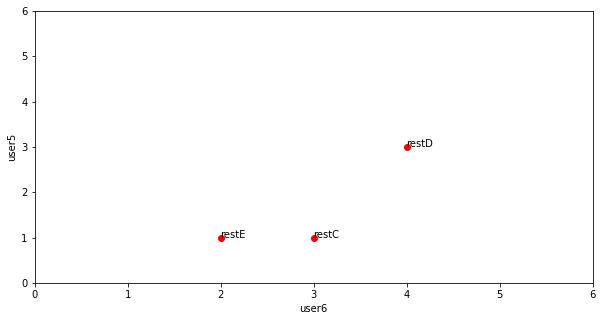

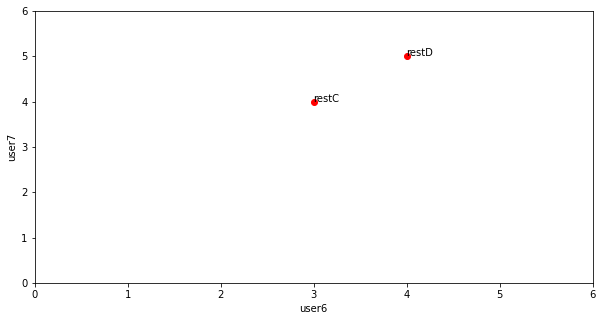

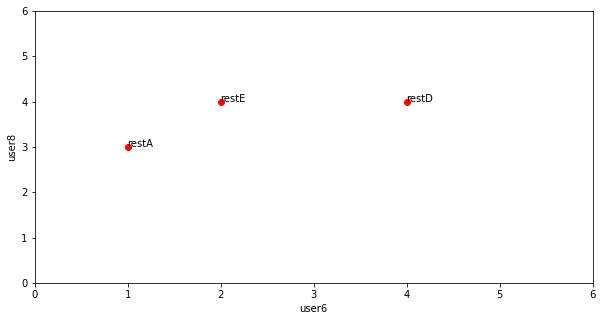

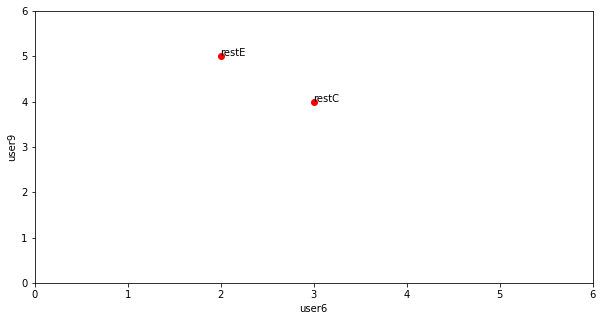

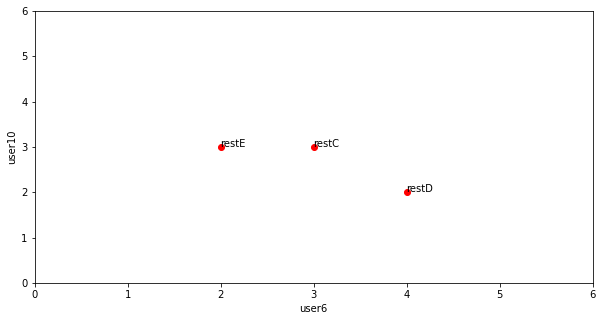

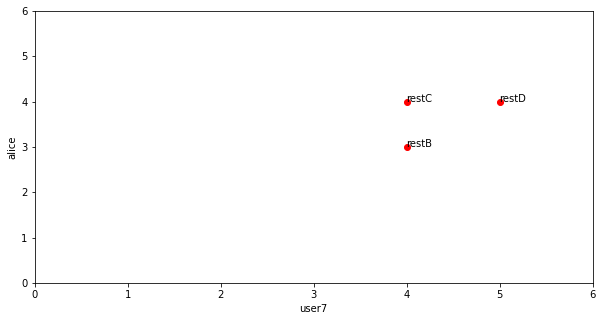

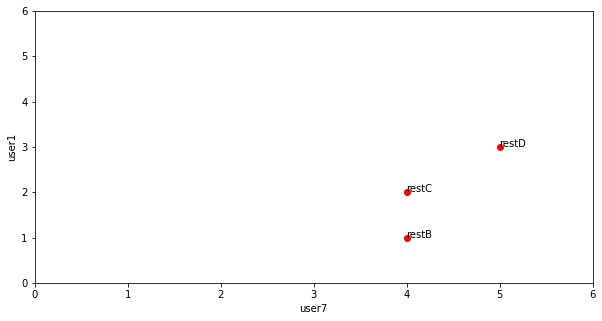

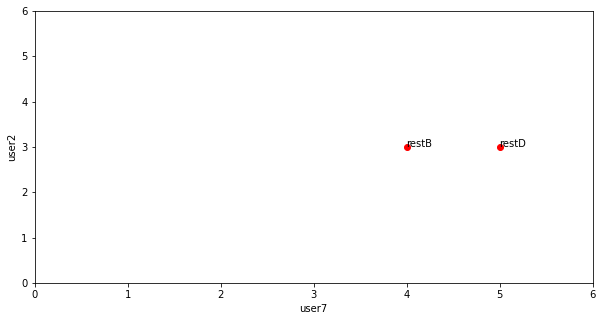

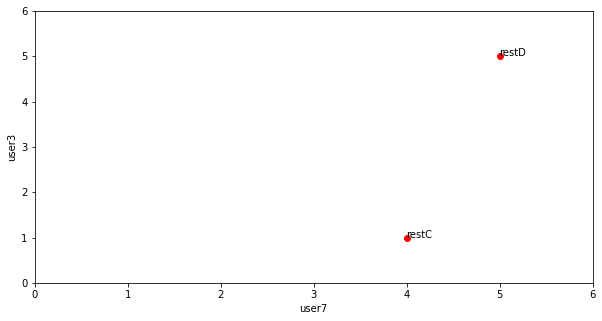

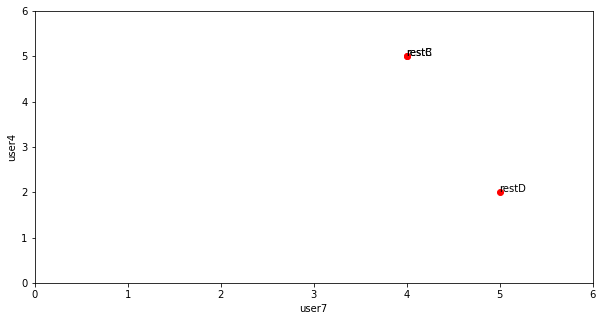

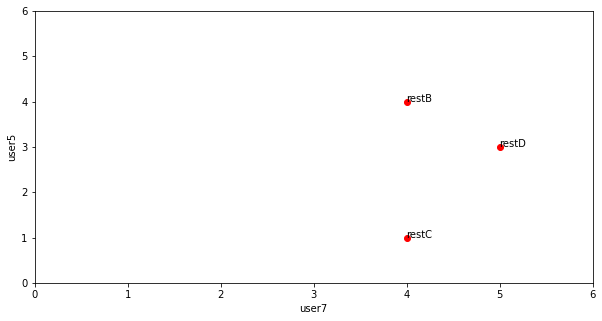

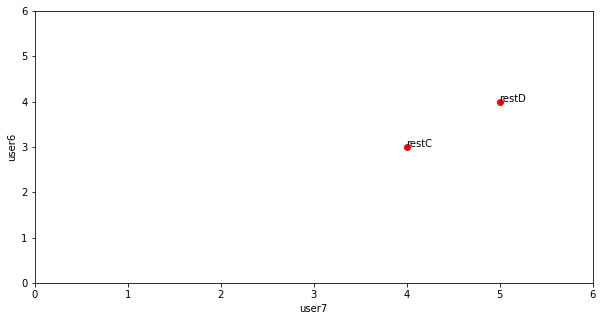

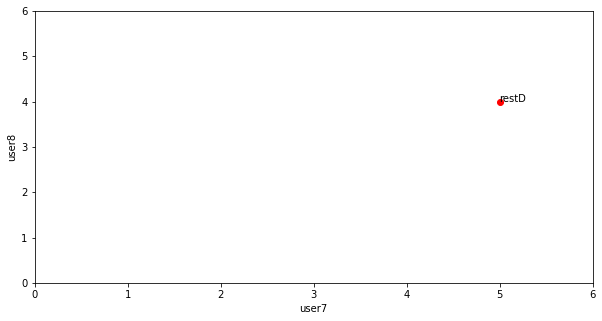

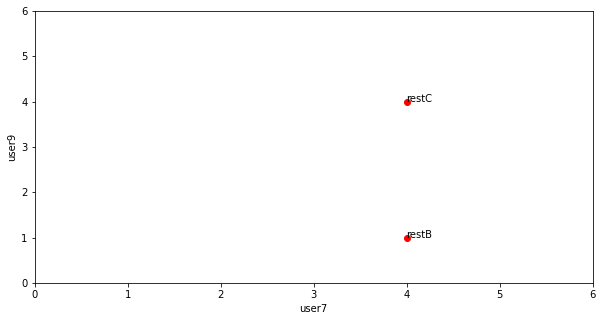

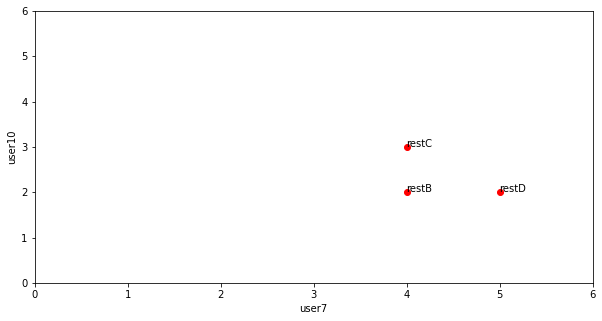

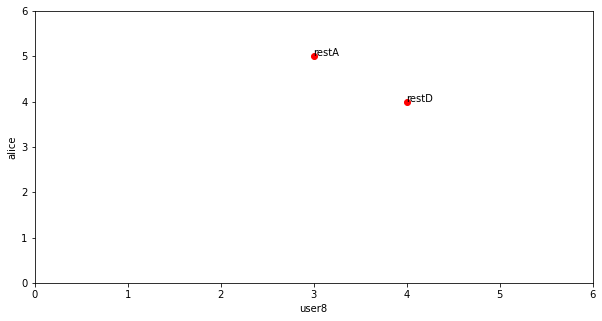

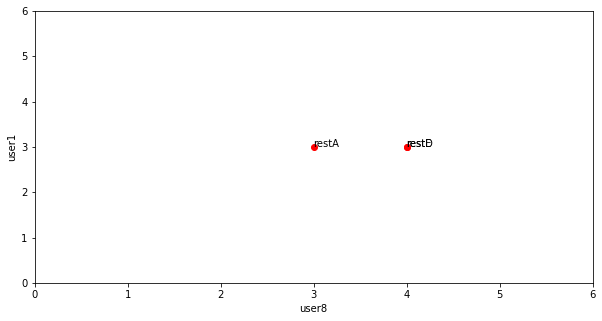

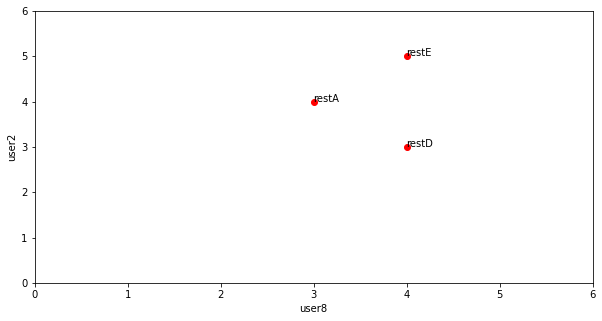

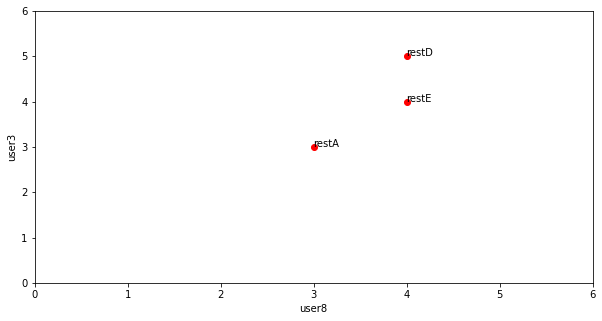

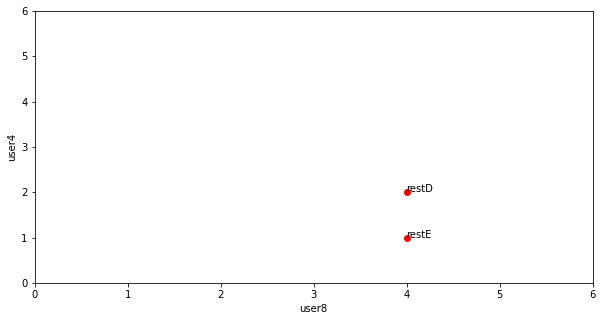

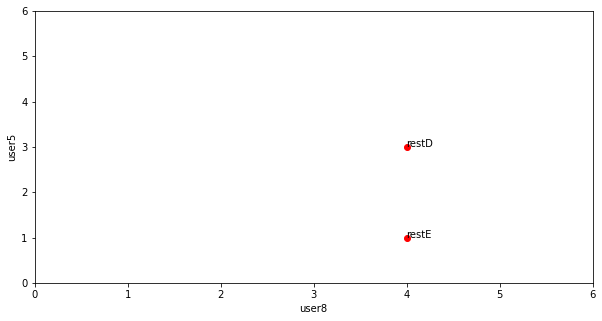

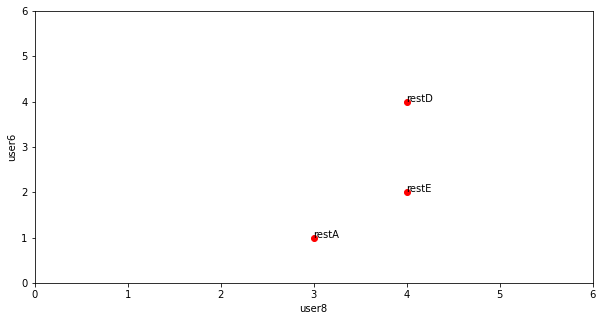

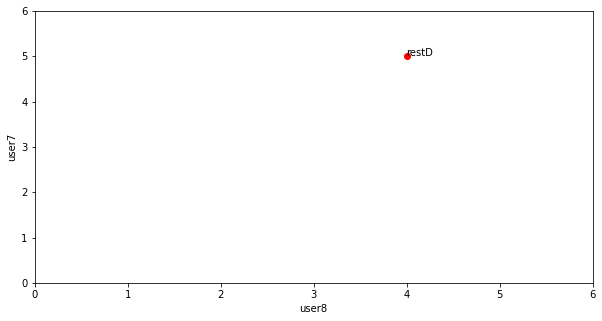

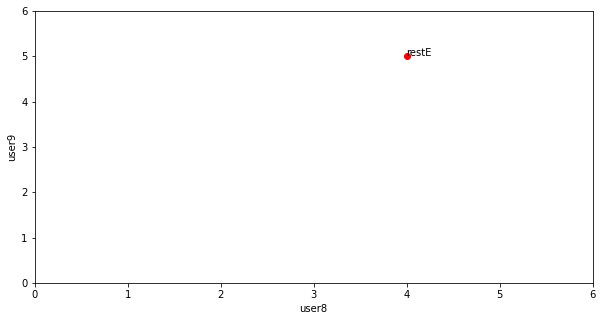

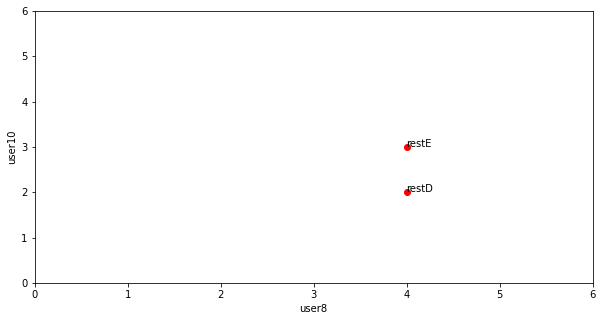

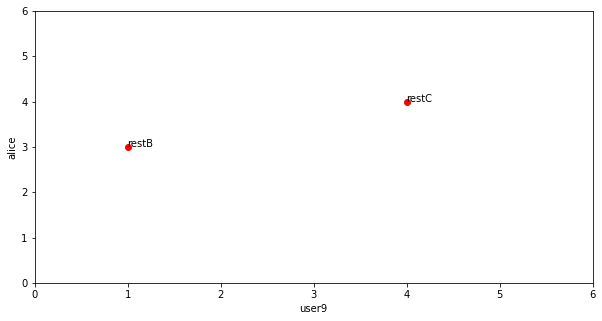

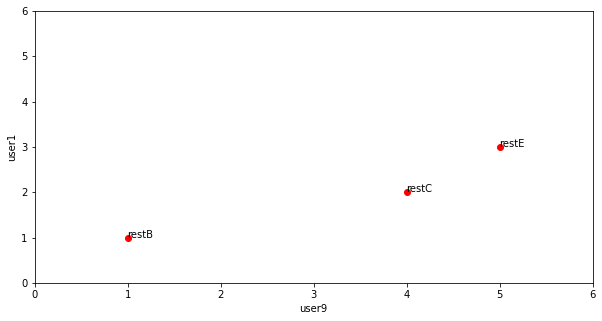

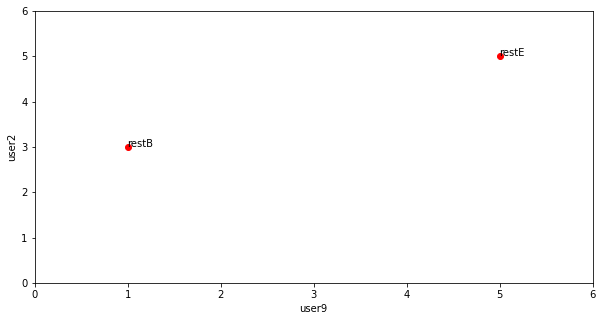

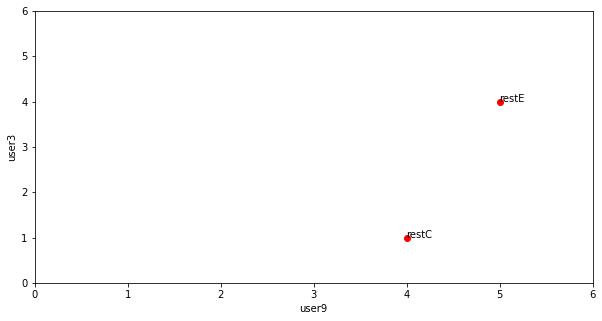

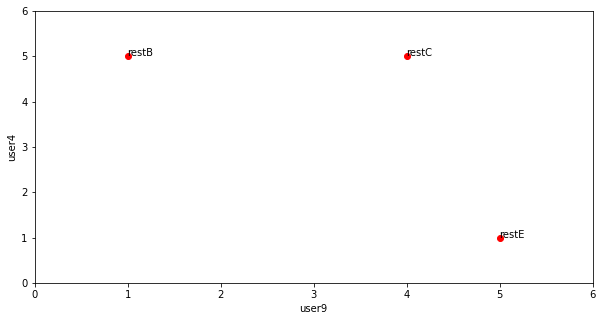

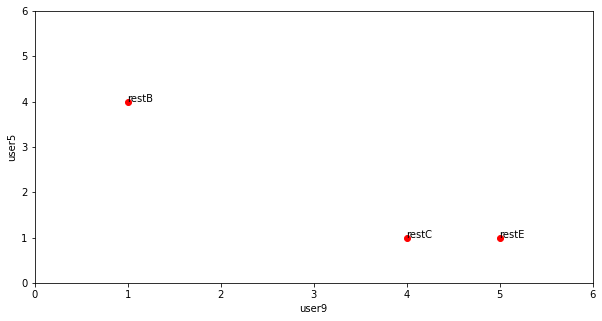

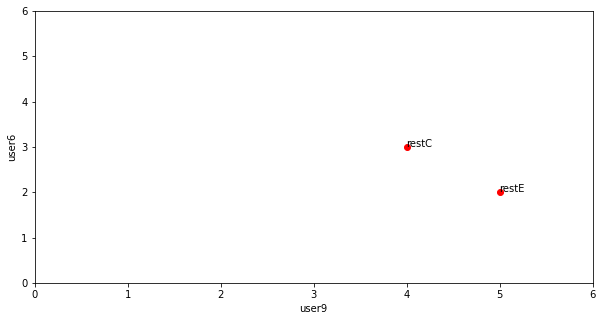

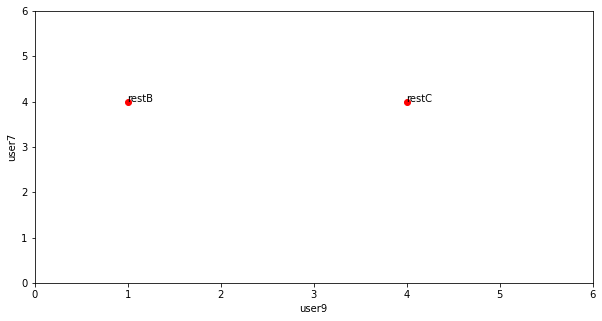

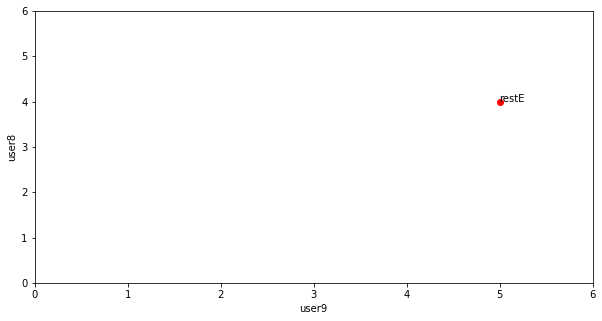

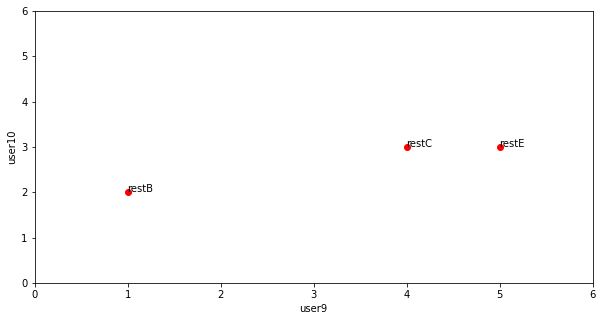

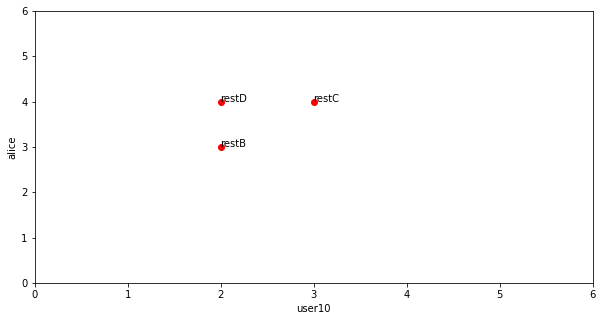

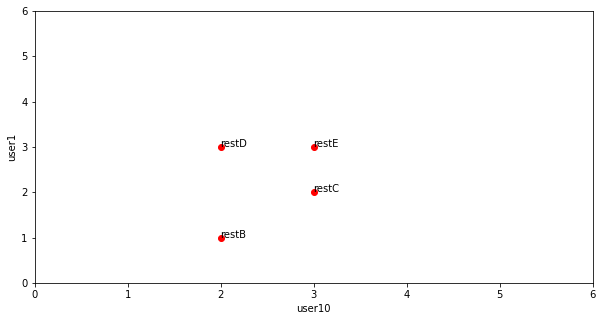

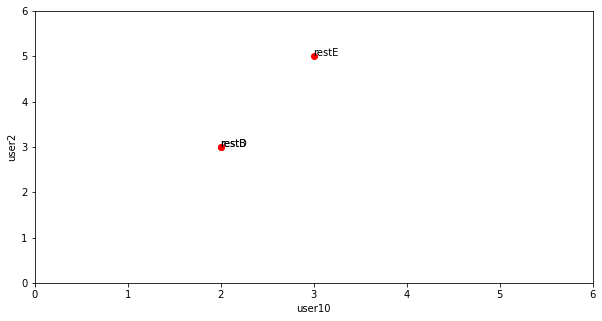

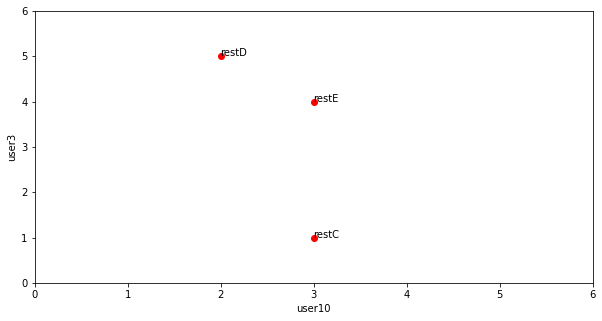

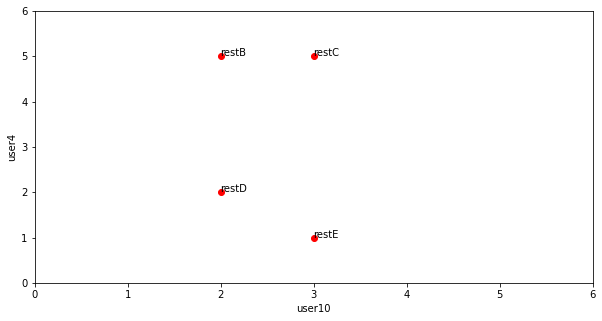

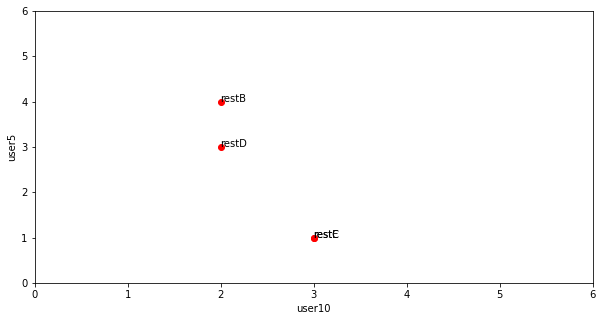

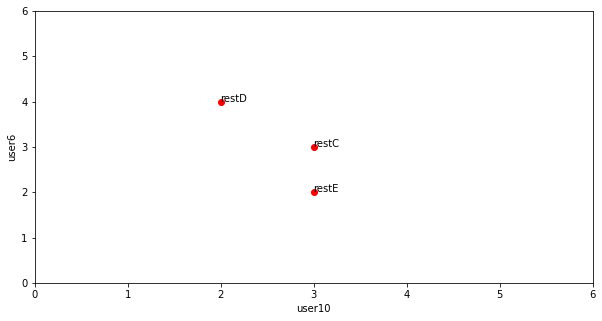

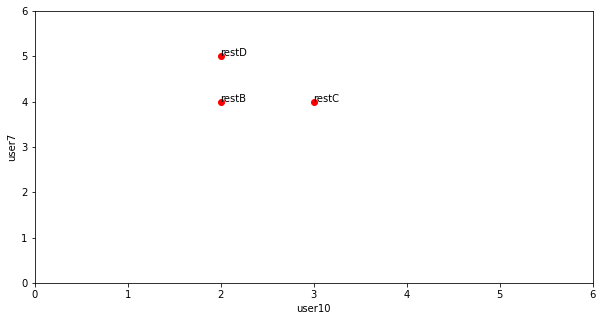

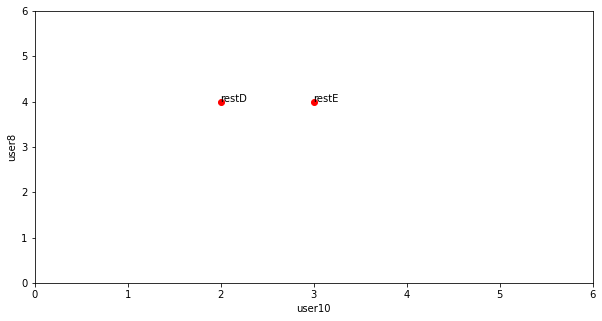

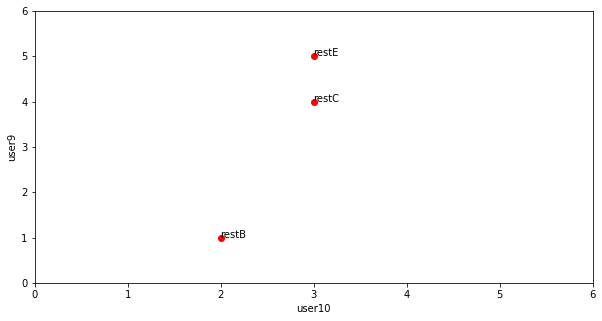

In [ ]:
# user간 평점별 scatter plot 출력
for i in dict_org.keys():
  for e in dict_org.keys():
    if i != e :
      scatter(dict_org, i, e)

#### (1-1) 피어슨 상관계수(유사도)

##### *피어슨 상관계수 계산식(유사도)
![](https://drive.google.com/uc?export=view&id=15NofO5cGTdcxsWKaF6QlsdsWbm7ObM06)

In [ ]:
# pearson 상관계수를 구하기 위한 사전 함수 정의
def pearson_pre_sim(data, user_a, user_b):
    x_sum = 0 # x의 합
    y_sum = 0 # y의 합
    co_cnt = 0 # 공통 갯수
    
    for i in data[user_a]: # 여기서 i는 두 번째 dict의 key인 rest. i가 dict_org[user_a]의 key에 있으면, 아래 문장을 반복해라.
        if i in data[user_b]: # for문의 i가 dict_org[user_b]의 key에 존재하면(==동일한 rest key가 존재하면 == user a와 b가 동일한 rest i에 평점을 남겼으면)
            x_sum+=data[user_a][i] # x_sum에 data[user_a][i](user_a가 rest_i에 남긴 평점)를 더해주고 다시 x_sum으로 받는다.
            y_sum+=data[user_b][i] # y_sum에 data[user_b][i]를 더해주고 다시 y_sum으로 받는다.
            co_cnt+=1
    x_mean = x_sum / co_cnt
    y_mean = y_sum / co_cnt
    
    return x_sum, y_sum, co_cnt, x_mean, y_mean

In [ ]:
pearson_pre_sim(dict_org, "alice", "user1")

(16, 9, 4, 4.0, 2.25)

In [ ]:
# pearson 상관계수를 계산하는 함수 정의
def pearson_sim(data, user_a, user_b):
  x_sum, y_sum, co_cnt, x_mean, y_mean = pearson_pre_sim(data, user_a, user_b)
  up = 0
  down_x = 0
  down_y = 0

  for i in data[user_a]: # 여기서 i는 두 번째 dict의 key인 rest. i가 dict_org[user_a]의 key에 있으면, 아래 문장을 반복해라.
      if i in data[user_b]: # for문의 i가 dict_org[user_b]의 key에 존재하면(==동일한 rest key가 존재하면 == user a와 b가 동일한 rest i에 평점을 남겼으면)
         up += (data[user_a][i] - (x_mean)) * (data[user_b][i] - (y_mean))
         #y_res += data[user_b][i] - (y_mean)
         down_x += pow((data[user_a][i] - (x_mean)),2)
         down_y += pow((data[user_b][i] - (y_mean)),2)
  pearson_corr = up / (np.sqrt(down_x * down_y))
  
  return co_cnt, pearson_corr#up, np.sqrt(down_x), np.sqrt(down_y)

In [ ]:
pearson_sim(dict_org, "alice", "user1")

(4, 0.8528028654224417)

In [ ]:
# pearson 상관계수를 특정 user vs 전체 user기준으로 계산하는 함수 정의
def pearson_sim_output(data, user_name, func = pearson_sim):
  pearson_sim_list = [] # 출력할 빈 리스트 생성
  for i in data: # 앞 코드 로직과 동일
    if user_name != i: # 앞 코드 로직과 동일
      pearson_sim_list.append((user_name, i, func(data, user_name, i)[0], func(data, user_name, i)[1])) # func에 의해 생성되는 상관계수값과 유사도를 구한 i(user_name)을 함께 append하려면 괄호를 두번 씌워야함
  return pearson_sim_list

In [ ]:
pearson_sim_output(dict_org, "alice")

[('alice', 'user1', 4, 0.8528028654224417),
 ('alice', 'user2', 3, 0.8660254037844385),
 ('alice', 'user3', 3, 0.0),
 ('alice', 'user4', 3, -0.5),
 ('alice', 'user5', 3, -0.7559289460184544),
 ('alice', 'user6', 3, -0.9449111825230683),
 ('alice', 'user7', 3, 0.5),
 ('alice', 'user8', 2, -1.0),
 ('alice', 'user9', 2, 1.0),
 ('alice', 'user10', 3, 0.49999999999999994)]

##### *예측치 생성 계산식
- 단순 예시이며, 이 외에도 여러 방법이 존재함

![](https://drive.google.com/uc?export=view&id=1XzwlkY9PlZnAKPw2XRJro4AZM5F9i0em)

In [ ]:
# pearson 상관계수(유사도)를 활용한 예측치 생성함수 정의
def pred_by_pearson(data, user_a, user_b):
  x_sum, y_sum, co_cnt, x_mean, y_mean = pearson_pre_sim(data, user_a, user_b)
  pearson_corr = pearson_sim(data, user_a, user_b)[1]
  cons = x_mean
  down = pearson_corr
  np.seterr(divide='ignore', invalid='ignore')

  for i in data[user_b]: # 여기서 i는 두 번째 dict의 key인 rest. i가 dict_org[user_a]의 key에 있으면, 아래 문장을 반복해라.
    if i not in data[user_a]: # for문의 i가 dict_org[user_b]의 key에 존재하면(==동일한 rest key가 존재하면 == user a와 b가 동일한 rest i에 평점을 남겼으면)
      global y_res_sum
      y_res_sum = (data[user_b][i] - (y_mean))
  up = pearson_corr * y_res_sum
  pred = round((cons + (up / down)),2)
  if pred > 5:
    pred = 5
  elif pred < 0 or np.isnan(pred) :
    pred = 0
  else :
    pred = pred # 평점의 범위가 0 ~ 5이기 때문에 이외의 값들은 범위 내로 치환
  return co_cnt, pearson_corr, pred
#  return print("predict target : " + str(user_a) + " with " + str(user_b) + " / "
#               "similar_by_pearson : " + str(pearson_corr) + " / "
#               "y_weight : " + str(y_res_sum) + " / "
#               "pred_result : " + str(pred))

In [ ]:
pred_by_pearson(dict_org, "alice", "user1")

(4, 0.8528028654224417, 4.75)

In [ ]:
# pearson 상관계수를 특정 user 기준으로 계산하는 함수 정의
def pearson_pred_output(data, user_name, func = pred_by_pearson):
  pearson_pred_list = [] # 출력할 빈 리스트 생성
  for i in data: # 앞 코드 로직과 동일
    if user_name != i: # 앞 코드 로직과 동일
        pearson_pred_list.append((user_name, i, func(data, user_name, i)[0], func(data, user_name, i)[1], func(data, user_name, i)[2])) # func에 의해 생성되는 상관계수값과 유사도를 구한 i(user_name)을 함께 append하려면 괄호를 두번 씌워야함
  return pearson_pred_list

In [ ]:
pearson_pred_output(dict_org, "alice")

[('alice', 'user1', 4, 0.8528028654224417, 4.75),
 ('alice', 'user2', 3, 0.8660254037844385, 5),
 ('alice', 'user3', 3, 0.0, 0),
 ('alice', 'user4', 3, -0.5, 0.67),
 ('alice', 'user5', 3, -0.7559289460184544, 2.0),
 ('alice', 'user6', 3, -0.9449111825230683, 3.67),
 ('alice', 'user7', 3, 0.5, 3.0),
 ('alice', 'user8', 2, -1.0, 5.0),
 ('alice', 'user9', 2, 1.0, 5),
 ('alice', 'user10', 3, 0.49999999999999994, 4.33)]

In [ ]:
pred_df = pd.DataFrame(pearson_pred_output(dict_org, "alice"), columns=["target_user", "with_user", "co_rated_cnt","similarity_pearson","pred_rated"]).sort_values(by=["similarity_pearson", "co_rated_cnt"], ascending=False)
pred_df

,target_user,with_user,co_rated_cnt,similarity_pearson,pred_rated
8,alice,user9,2,1.000000,5.00
1,alice,user2,3,0.866025,5.00
0,alice,user1,4,0.852803,4.75
6,alice,user7,3,0.500000,3.00
9,alice,user10,3,0.500000,4.33
2,alice,user3,3,0.000000,0.00
3,alice,user4,3,-0.500000,0.67
4,alice,user5,3,-0.755929,2.00
5,alice,user6,3,-0.944911,3.67
7,alice,user8,2,-1.000000,5.00


In [ ]:
px.scatter(pred_df, x="similarity_pearson", y="pred_rated", color="with_user",
                 size='co_rated_cnt')

###### *Top - N에 대한 예측치생성


In [ ]:
def top_n_output(df, top_n=3):
  df[df["similarity_pearson"]>0]
  top_n_df = df.nlargest(top_n, ["similarity_pearson","co_rated_cnt"])
  return top_n_df
#pred_df.nlargest(3, ["similarity_pearson", "co_rated_cnt"])

In [ ]:
top_n_output(pred_df)

,target_user,with_user,co_rated_cnt,similarity_pearson,pred_rated
8,alice,user9,2,1.000000,5.00
1,alice,user2,3,0.866025,5.00
0,alice,user1,4,0.852803,4.75


In [ ]:
def prediction_by_top_n(df, func=top_n_output):
  top_n_df = top_n_output(df)
  sum_pred_rated = top_n_df.pred_rated.sum()
  sum_sim = top_n_df.similarity_pearson.sum()
  cf_pred_rating = sum_pred_rated / sum_sim
  
  if cf_pred_rating > 5:
    cf_pred_rating = 5
  elif i < 0 or np.isnan(i) :
    cf_pred_rating = 0
  else :
    cf_pred_rating = pred # 평점의 범위가 0 ~ 5이기 때문에 이외의 값들은 범위 내로 치환
  return cf_pred_rating


In [ ]:
prediction_by_top_n(pred_df)

5

#### (1-2) 코사인 유사도

![](https://drive.google.com/uc?export=view&id=1SpKhUYRyYkyKYWagt4kS0mVhCz2t1-jq)

In [ ]:
cos_df = pd.DataFrame(dict_org)

In [ ]:
cos_df

,alice,user1,user2,user3,user4,user5,user6,user7,user8,user9,user10
restA,5.0,3,4.0,3.0,NaN,NaN,1.0,NaN,3.0,NaN,NaN
restB,3.0,1,3.0,NaN,5.0,4.0,NaN,4.0,NaN,1.0,2.0
restC,4.0,2,NaN,1.0,5.0,1.0,3.0,4.0,NaN,4.0,3.0
restD,4.0,3,3.0,5.0,2.0,3.0,4.0,5.0,4.0,NaN,2.0
restE,NaN,3,5.0,4.0,1.0,1.0,2.0,NaN,4.0,5.0,3.0


In [ ]:
cos_df["user1"].mean()

2.4

In [ ]:
# cos 유사도를 계산하는 함수 정의
def cos_sim(data, user_a, user_b, df=cos_df):
  df=df
  up = 0
  down_x = 0
  down_y = 0

  for i in data[user_a]: # 여기서 i는 두 번째 dict의 key인 rest. i가 dict_org[user_a]의 key에 있으면, 아래 문장을 반복해라.
      if i in data[user_b]: # for문의 i가 dict_org[user_b]의 key에 존재하면(==동일한 rest key가 존재하면 == user a와 b가 동일한 rest i에 평점을 남겼으면)
         up += (data[user_a][i] - (df[user_a].mean())) * (data[user_b][i] - (df[user_b].mean()))
         #y_res += data[user_b][i] - (y_mean)
         down_x += pow((data[user_a][i] - (df[user_a].mean())),2)
         down_y += pow((data[user_b][i] - (df[user_b].mean())),2)
  cos_sim = up / (np.sqrt(down_x * down_y))
  
  return cos_sim #up, np.sqrt(down_x), np.sqrt(down_y)

In [ ]:
cos_sim(dict_org, "alice", "user1")

0.8391813582966892

In [ ]:
# cos 유사도를 특정 user vs 전체 user기준으로 계산하는 함수 정의
def cos_sim_output(data, user_name, func = cos_sim):
  cos_sim_list = [] # 출력할 빈 리스트 생성
  for i in data: # 앞 코드 로직과 동일
    if user_name != i: # 앞 코드 로직과 동일
      cos_sim_list.append((func(data, user_name, i), i)) # func에 의해 생성되는 상관계수값과 유사도를 구한 i(user_name)을 함께 append하려면 괄호를 두번 씌워야함
  return cos_sim_list

In [ ]:
cos_sim_output(dict_org, "alice")

[(0.8391813582966892, 'user1'),
 (0.6488856845230502, 'user2'),
 (-0.0873704056661038, 'user3'),
 (-0.6311687442672026, 'user4'),
 (-0.7683498199278324, 'user5'),
 (-0.6882472016116852, 'user6'),
 (0.40824829046386263, 'user7'),
 (-0.8944271909999159, 'user8'),
 (0.961523947640823, 'user9'),
 (0.5773502691896258, 'user10')]

In [ ]:
pearson_sim_output(dict_org, "alice")

[('alice', 'user1', 4, 0.8528028654224417),
 ('alice', 'user2', 3, 0.8660254037844385),
 ('alice', 'user3', 3, 0.0),
 ('alice', 'user4', 3, -0.5),
 ('alice', 'user5', 3, -0.7559289460184544),
 ('alice', 'user6', 3, -0.9449111825230683),
 ('alice', 'user7', 3, 0.5),
 ('alice', 'user8', 2, -1.0),
 ('alice', 'user9', 2, 1.0),
 ('alice', 'user10', 3, 0.49999999999999994)]

### (2) 아이템 기반(Item-Based)
##### 사용자 기반과 유사하나, 아이템간의 유사도를 측정하여 고객별 선호 아이템을 예측한다.
- A라는 아이템과 B라는 아이템이 유사하니까 B는 구매했는데 A는 구매하지 않은 사람에게 A를 추천하자.

![](https://drive.google.com/uc?export=view&id=1mbZH6AvBXAnWOOYcI-suLDVOlC2O7U-7)

### *코사인 유사도 계산식
![](https://drive.google.com/uc?export=view&id=1UK3NdKapweNVrZpqvNzWlbm5T9WuutUn)
#### - ru_mean은 item a와 b를 모두 평가한 user 평점의 평균

### 예)
![](https://drive.google.com/uc?export=view&id=13PVnZXHOD4G03SVmOGzm9EDflSzRdNSp)


In [ ]:
dict_org

{'alice': {'restA': 5, 'restB': 3, 'restC': 4, 'restD': 4},
 'user1': {'restA': 3, 'restB': 1, 'restC': 2, 'restD': 3, 'restE': 3},
 'user2': {'restA': 4, 'restB': 3, 'restC': 4, 'restD': 3, 'restE': 5},
 'user3': {'restA': 3, 'restB': 3, 'restC': 1, 'restD': 5, 'restE': 4},
 'user4': {'restA': 1, 'restB': 5, 'restC': 5, 'restD': 2, 'restE': 1}}

### *예측치 생성 공식예시

![](https://drive.google.com/uc?export=view&id=1YTR4RNutFeLGCQ4k7UviUxxo5yaIeDsk)

## 2) Latent Factor Collaborative Filtering
### Matrix Factorization - TBD

In [ ]:
#@title (2) 아이템 기반 유사도 측정 - 코사인 유사도 측정
from numpy import dot
from numpy.linalg import norm

def cos_sim(a, b):
  return dot(a, b) / (norm(a)*norm(b))

In [ ]:
df.isnull()

,restA,restB,restC,restD,restE
alice,False,False,False,False,True
user1,False,False,False,False,False
user2,False,False,False,False,False
user3,False,False,False,False,False
user4,False,False,False,False,False


In [ ]:
df[df.isnull()==False]

,restA,restB,restC,restD,restE
alice,5.0,3.0,4.0,4.0,NaN
user1,3.0,1.0,2.0,3.0,3.0
user2,4.0,3.0,4.0,3.0,5.0
user3,3.0,3.0,1.0,5.0,4.0
user4,1.0,5.0,5.0,2.0,1.0


In [ ]:
np.array(df.fillna(value=).iloc[0,:])

SyntaxError: ignored

In [ ]:
alice = np.array(df.iloc[0,:])
user1 = np.array(df.iloc[1,:])
user2 = np.array(df.iloc[2,:])
user3 = np.array(df.iloc[3,:])
user4 = np.array(df.iloc[4,:])

In [ ]:
cos_sim(alice, user1)

ValueError: ignored